In [27]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df=pd.read_csv("/data2/ffp/datasets/daily/2015/07/20150730_norm.csv")

In [3]:
df

,id,firedate,max_temp,min_temp,mean_temp,res_max,dom_vel,rain_7days,dem,slope,...,month_7,month_4,month_5,month_6,month_8,month_9,frequency,f81,x,y
0,333237.0,20150730,0.849671,0.804729,0.843411,0.092412,0.138356,0.000088,0.032146,0.030961,...,1,0,0,0,0,0,0.0,0.001392,0.781966,1.000000
1,335462.0,20150730,0.836843,0.806189,0.837291,0.092412,0.127498,0.000092,0.029680,0.029864,...,1,0,0,0,0,0,0.0,0.001392,0.780863,0.999466
2,335463.0,20150730,0.849671,0.804729,0.843411,0.092412,0.138356,0.000088,0.034410,0.027004,...,1,0,0,0,0,0,0.0,0.001392,0.781199,0.999647
3,335464.0,20150730,0.849671,0.804729,0.843411,0.092412,0.138356,0.000088,0.032146,0.030961,...,1,0,0,0,0,0,0.0,0.001392,0.781797,0.999929
4,337688.0,20150730,0.836843,0.806189,0.837291,0.092412,0.127498,0.000092,0.037847,0.035692,...,1,0,0,0,0,0,0.0,0.001392,0.779850,0.998927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372951,2996868.0,20150730,0.645476,0.903426,0.760677,0.344471,0.349348,0.000016,0.002148,0.015507,...,1,0,0,0,0,0,0.0,0.000000,0.858637,0.155649
372952,2999095.0,20150730,0.645476,0.903426,0.760677,0.344471,0.349348,0.000016,0.003355,0.006261,...,1,0,0,0,0,0,0.0,0.000000,0.858781,0.154940
372953,3001322.0,20150730,0.645476,0.903426,0.760677,0.344471,0.349348,0.000016,0.003355,0.006261,...,1,0,0,0,0,0,0.0,0.000000,0.858663,0.154468
372954,3235050.0,20150730,0.657105,0.882089,0.756951,0.344471,0.217974,0.000012,0.002214,0.000187,...,1,0,0,0,0,0,0.0,0.021810,0.783294,0.082484


In [4]:
df.columns

Index(['id', 'firedate', 'max_temp', 'min_temp', 'mean_temp', 'res_max',
       'dom_vel', 'rain_7days', 'dem', 'slope', 'curvature', 'aspect',
       'ndvi_new', 'evi', 'lst_day', 'lst_night', 'max_dew_temp',
       'mean_dew_temp', 'min_dew_temp', 'fire', 'dir_max_1', 'dir_max_2',
       'dir_max_3', 'dir_max_4', 'dir_max_5', 'dir_max_6', 'dir_max_7',
       'dir_max_8', 'dom_dir_1', 'dom_dir_2', 'dom_dir_3', 'dom_dir_4',
       'dom_dir_5', 'dom_dir_6', 'dom_dir_7', 'dom_dir_8', 'corine_111',
       'corine_112', 'corine_121', 'corine_122', 'corine_123', 'corine_124',
       'corine_131', 'corine_132', 'corine_133', 'corine_141', 'corine_142',
       'corine_211', 'corine_212', 'corine_213', 'corine_221', 'corine_222',
       'corine_223', 'corine_231', 'corine_241', 'corine_242', 'corine_243',
       'corine_244', 'corine_311', 'corine_312', 'corine_313', 'corine_321',
       'corine_322', 'corine_323', 'corine_324', 'corine_331', 'corine_332',
       'corine_333', 'corine_334', 'c

In [58]:
dayds=xr.load_dataset("/data2/ffp/datasets/daily/2015/09/20150911_grid.nc")

<AxesSubplot:>

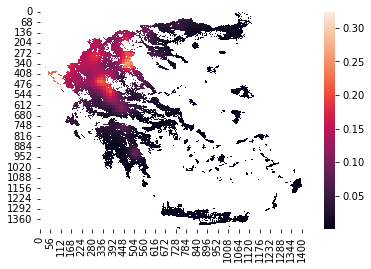

In [11]:
sns.heatmap(dayds['rain_7days'][:,:,0].transpose())

<xarray.DataArray 'wkd_4' ()>
array(0)

In [67]:
day=pd.Timestamp(dayds.coords['time'].values[0]).to_pydatetime()

In [68]:
nday=day.weekday()
nday

4

In [73]:
mday=day.month
mday

9

In [81]:
ones=xr.full_like(dayds.fire, 1)
zeroes=xr.full_like(dayds.fire, 0)
for d in range(0,7):
    if (d==nday):
        dayds['wkd_%s'%d]=ones
    else:
        dayds['wkd_%s'%d]=zeroes

In [82]:
for m in range(4,10):
    if (m==mday):
        dayds['month_%s'%m]=ones
    else:
        dayds['month_%s'%m]=zeroes

In [83]:
dayds

<xarray.Dataset>
Dimensions:        (x: 1432, y: 1425, time: 1)
Coordinates:
  * x              (x) int32 0 1 2 3 4 5 6 ... 1426 1427 1428 1429 1430 1431
  * y              (y) int32 0 1 2 3 4 5 6 ... 1419 1420 1421 1422 1423 1424
  * time           (time) datetime64[ns] 2015-09-11
Data variables: (12/46)
    id             (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    max_temp       (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    min_temp       (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    mean_temp      (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    res_max        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    dom_vel        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    month_6        (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month_4        (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month_5        (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month_7        (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month_8        (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month_9        (x, y, time) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

Xarray Dataset to numpy. The feature sequence is not checked

In [74]:
dayds.to_array().to_numpy()[1,300,300]

array([20150730.], dtype=float32)

In [85]:
[i for i in dayds.data_vars]

['id',
 'firedate',
 'max_temp',
 'min_temp',
 'mean_temp',
 'res_max',
 'dom_vel',
 'rain_7days',
 'dem',
 'slope',
 'curvature',
 'aspect',
 'ndvi_new',
 'evi',
 'lst_day',
 'lst_night',
 'max_dew_temp',
 'mean_dew_temp',
 'min_dew_temp',
 'fire',
 'dir_max_1',
 'dir_max_2',
 'dir_max_3',
 'dir_max_4',
 'dir_max_5',
 'dir_max_6',
 'dir_max_7',
 'dir_max_8',
 'dom_dir_1',
 'dom_dir_2',
 'dom_dir_3',
 'dom_dir_4',
 'dom_dir_5',
 'dom_dir_6',
 'dom_dir_7',
 'dom_dir_8',
 'corine_111',
 'corine_112',
 'corine_121',
 'corine_122',
 'corine_123',
 'corine_124',
 'corine_131',
 'corine_132',
 'corine_133',
 'corine_141',
 'corine_142',
 'corine_211',
 'corine_212',
 'corine_213',
 'corine_221',
 'corine_222',
 'corine_223',
 'corine_231',
 'corine_241',
 'corine_242',
 'corine_243',
 'corine_244',
 'corine_311',
 'corine_312',
 'corine_313',
 'corine_321',
 'corine_322',
 'corine_323',
 'corine_324',
 'corine_331',
 'corine_332',
 'corine_333',
 'corine_334',
 'corine_411',
 'corine_412',
 

## Creating numpy from xarray dataset in fixed feature order.

In [9]:
features=['max_temp', 'min_temp', 'mean_temp', 'res_max',
       'dom_vel', 'rain_7days', 'dem', 'slope', 'curvature', 'aspect',
       'ndvi_new', 'evi', 'lst_day', 'lst_night', 'max_dew_temp',
       'mean_dew_temp', 'min_dew_temp', 'fire', 'dir_max_1', 'dir_max_2',
       'dir_max_3', 'dir_max_4', 'dir_max_5', 'dir_max_6', 'dir_max_7',
       'dir_max_8', 'dom_dir_1', 'dom_dir_2', 'dom_dir_3', 'dom_dir_4',
       'dom_dir_5', 'dom_dir_6', 'dom_dir_7', 'dom_dir_8', 'corine_111',
       'corine_112', 'corine_121', 'corine_122', 'corine_123', 'corine_124',
       'corine_131', 'corine_132', 'corine_133', 'corine_141', 'corine_142',
       'corine_211', 'corine_212', 'corine_213', 'corine_221', 'corine_222',
       'corine_223', 'corine_231', 'corine_241', 'corine_242', 'corine_243',
       'corine_244', 'corine_311', 'corine_312', 'corine_313', 'corine_321',
       'corine_322', 'corine_323', 'corine_324', 'corine_331', 'corine_332',
       'corine_333', 'corine_334', 'corine_411', 'corine_412', 'corine_421',
       'corine_422', 'corine_511', 'corine_512', 'corine_521', 'wkd_0',
       'wkd_1', 'wkd_2', 'wkd_3', 'wkd_4', 'wkd_5', 'wkd_6', 'month_7',
       'month_4', 'month_5', 'month_6', 'month_8', 'month_9', 'frequency',
       'f81', 'xpos', 'ypos']

In [11]:
correct_order_dayds=dayds[features]

In [13]:
correct_order_dayds

<xarray.Dataset>
Dimensions:        (x: 1432, y: 1425, time: 1)
Coordinates:
  * x              (x) int32 0 1 2 3 4 5 6 ... 1426 1427 1428 1429 1430 1431
  * y              (y) int32 0 1 2 3 4 5 6 ... 1419 1420 1421 1422 1423 1424
  * time           (time) datetime64[ns] 2015-07-30
Data variables: (12/91)
    max_temp       (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    min_temp       (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    mean_temp      (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    res_max        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    dom_vel        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    rain_7days     (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    month_8        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    month_9        (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    frequency      (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    f81            (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    xpos           (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan
    ypos           (x, y, time) float32 nan nan nan nan nan ... nan nan nan nan

In [14]:
correct_order_dayds.to_array().shape

(91, 1432, 1425, 1)